<a href="https://colab.research.google.com/github/TranThaiAn19146304/AI_project/blob/main/nhandien_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BƯỚC 1: THÊM THƯ VIỆN**

In [1]:
#import Module
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [2]:
#hàm vẽ đồ thị chất lượng
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

**BƯỚC 2: GET DỮ LIỆU**

In [3]:
#lưu ý bạn cần tạo file.pickle trước khi thực hiện bước kế tiếp, nó đơn giản là tạo một thư viện ảnh từ những bức ảnh của bạn và được đánh số
#get data
with open('data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

# Reshape Data
x_train = x_train[:299]
y_train = y_train[:299]

**BƯỚC 3: XỬ LÍ DỮ LIỆU**

In [4]:
# dinh dang x lan 1
x_train = x_train.reshape(x_train.shape[0], -1)

# dinh dang x lan 2
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 3)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

**BƯỚC 4: TẠO MODEL VÀ KIỂM TRA CHẤT LƯỢNG**

Epoch 1/200
8/8 [==============================] - 4s 40ms/step - loss: 0.6645 - acc: 0.3598 - val_loss: 0.6793 - val_acc: 0.2167
Epoch 2/200
8/8 [==============================] - 0s 12ms/step - loss: 0.5354 - acc: 0.3598 - val_loss: 0.5680 - val_acc: 0.2167
Epoch 3/200
8/8 [==============================] - 0s 10ms/step - loss: 0.4607 - acc: 0.3598 - val_loss: 0.5530 - val_acc: 0.2167
Epoch 4/200
8/8 [==============================] - 0s 11ms/step - loss: 0.4477 - acc: 0.4519 - val_loss: 0.5400 - val_acc: 0.5667
Epoch 5/200
8/8 [==============================] - 0s 12ms/step - loss: 0.4395 - acc: 0.6904 - val_loss: 0.5343 - val_acc: 0.5667
Epoch 6/200
8/8 [==============================] - 0s 12ms/step - loss: 0.4349 - acc: 0.6904 - val_loss: 0.5297 - val_acc: 0.5667
Epoch 7/200
8/8 [==============================] - 0s 10ms/step - loss: 0.4312 - acc: 0.7280 - val_loss: 0.5255 - val_acc: 0.6667
Epoch 8/200
8/8 [==============================] - 0s 11ms/step - loss: 0.4274 - acc: 0.74

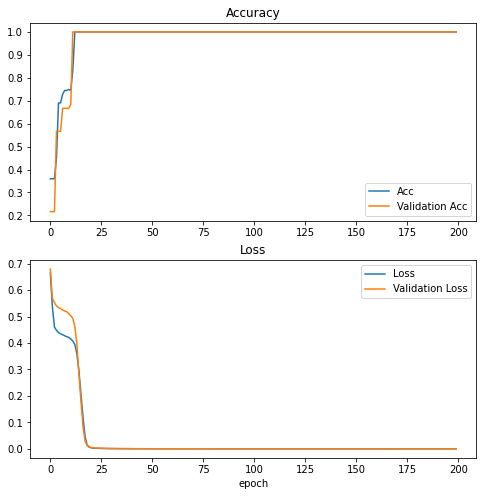

In [5]:
#tạo model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (67500,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 200, validation_split = 0.2)
plot_history(history)

**BƯỚC 5: NHẬN DẠNG**

0.99999726


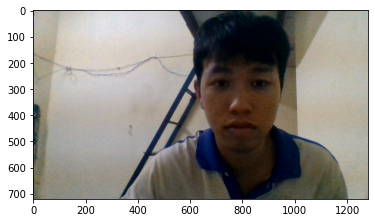

In [7]:
#upload 1 tấm ảnh khác để nhận dạng
img = cv2.imread('an.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))
img = cv2.resize(img,(150,150))
img = img.reshape(1,67500)
img = img.astype('float32')
img /= 255
#show độ chính xác tấm ảnh so với các đối tượng (bản thân là đối tượng đầu tiên)
dochinhxac = model.predict(img)[0][0]
print(dochinhxac)

5.182617e-07


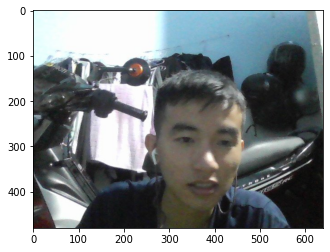

In [8]:
#upload 1 tấm ảnh khác để nhận dạng
img = cv2.imread('nhat.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))
img = cv2.resize(img,(150,150))
img = img.reshape(1,67500)
img = img.astype('float32')
img /= 255
#show độ chính xác tấm ảnh so với các đối tượng (bản thân là đối tượng đầu tiên)
dochinhxac = model.predict(img)[0][0]
print(dochinhxac)